In [1]:
import pandas as pd

df = pd.read_csv('/content/Indian_Kids_Screen_Time.csv')
display(df.head())
display(df.info())

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


None

In [9]:
df['Health_Impacts'] = df['Health_Impacts'].fillna('No Health Impact')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
 8   Weekday_Screen_Time_hr             9712 non-null   float64
 9   Weekend_Screen_Time_hr             9712 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(4)
memory usage: 692.5+ KB


None

In [8]:
df['Weekday_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'] * 0.7 # Assumption: 70% screen time on weekdays
df['Weekend_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'] * 1.3 # Assumption: 130% screen time on weekends

grouped_df = df.groupby('Gender')[['Weekday_Screen_Time_hr', 'Weekend_Screen_Time_hr']].mean().reset_index()
display(grouped_df.head())

,Gender,Weekday_Screen_Time_hr,Weekend_Screen_Time_hr
0,Female,3.028915,5.625127
1,Male,3.064428,5.691080


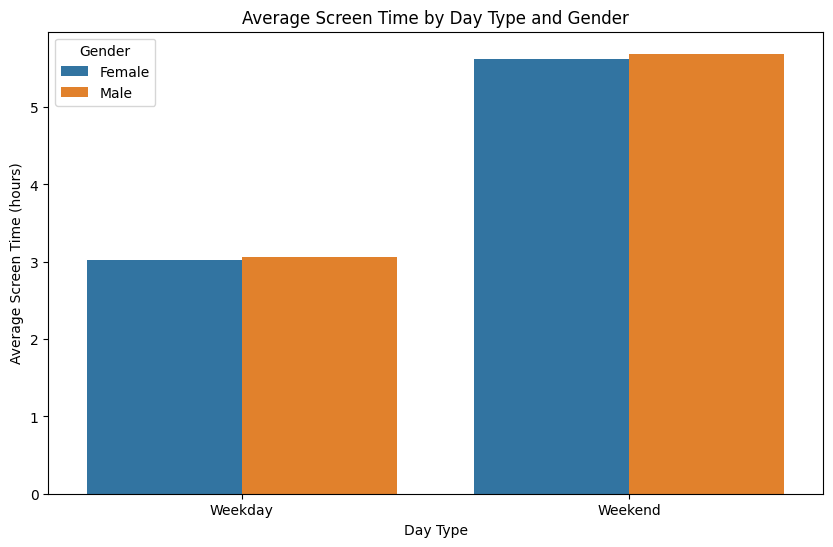

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

melted_df = grouped_df.melt(id_vars='Gender', var_name='Day_Type', value_name='Average_Screen_Time')
melted_df['Day_Type'] = melted_df['Day_Type'].replace({'Weekday_Screen_Time_hr': 'Weekday', 'Weekend_Screen_Time_hr': 'Weekend'})

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Day_Type', y='Average_Screen_Time', hue='Gender')
plt.title('Average Screen Time by Day Type and Gender')
plt.xlabel('Day Type')
plt.ylabel('Average Screen Time (hours)')
plt.show()

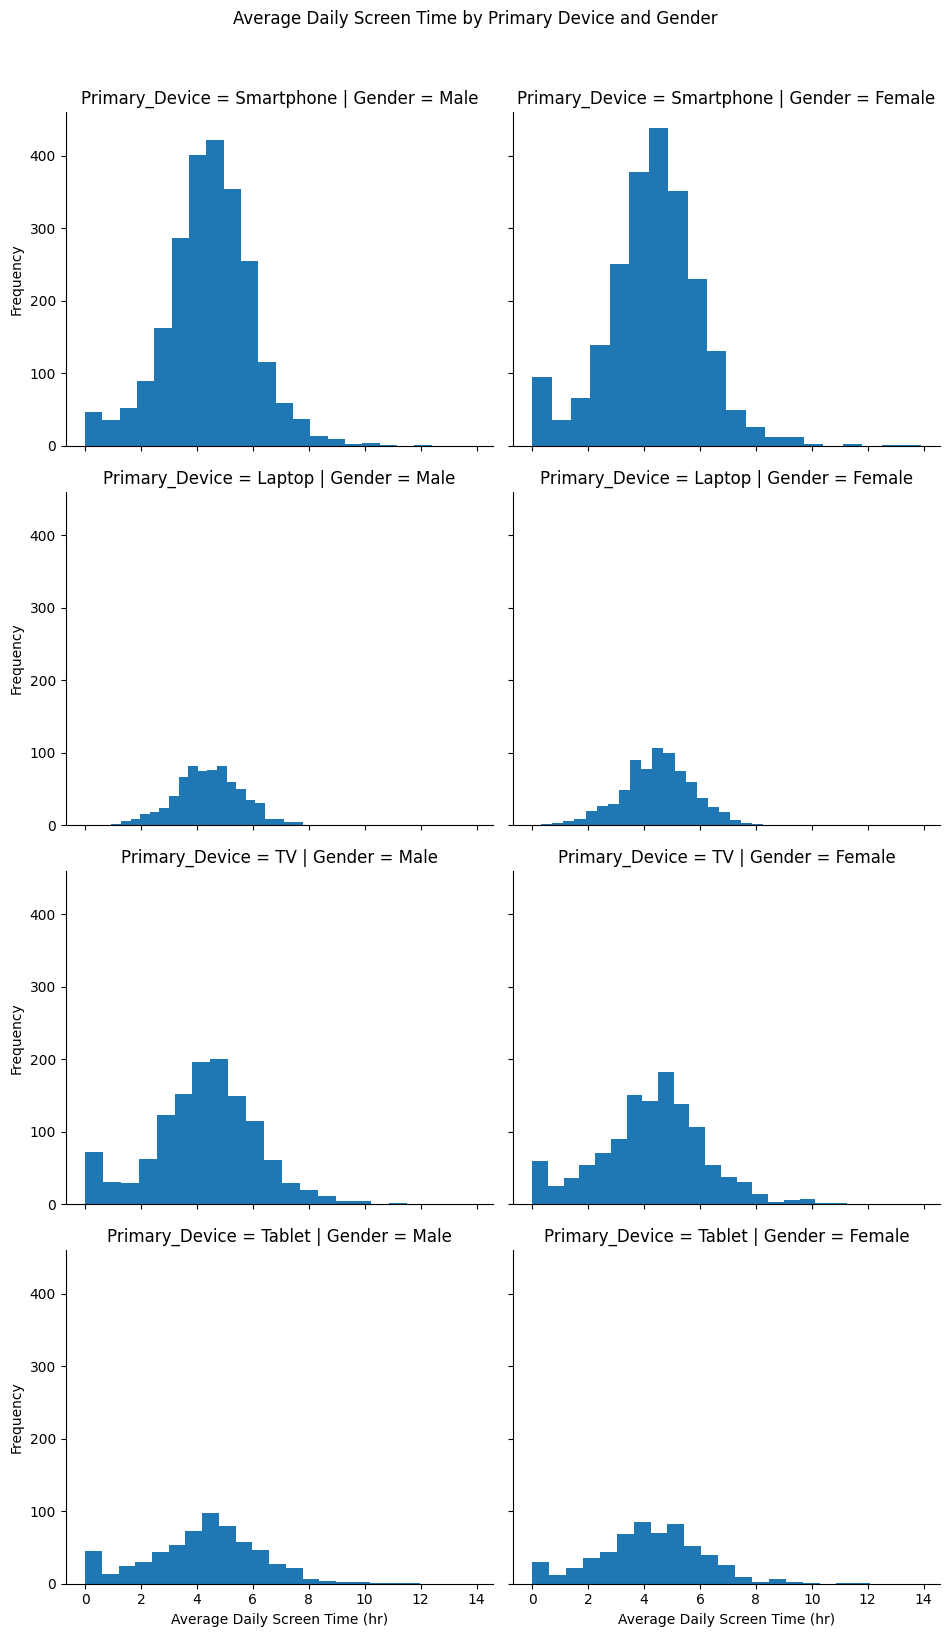

In [5]:
g = sns.FacetGrid(df, row='Primary_Device', col='Gender', height=4, aspect=1.2)
g.map(plt.hist, 'Avg_Daily_Screen_Time_hr', bins=20)

for ax in g.axes.flat:
    row_title = ax.get_title().split('|')[0].strip()
    col_title = ax.get_title().split('|')[1].strip()
    ax.set_title(f'{row_title} | {col_title}')

g.set_axis_labels('Average Daily Screen Time (hr)', 'Frequency')
g.fig.suptitle('Average Daily Screen Time by Primary Device and Gender', y=1.02)
plt.tight_layout()
plt.show()

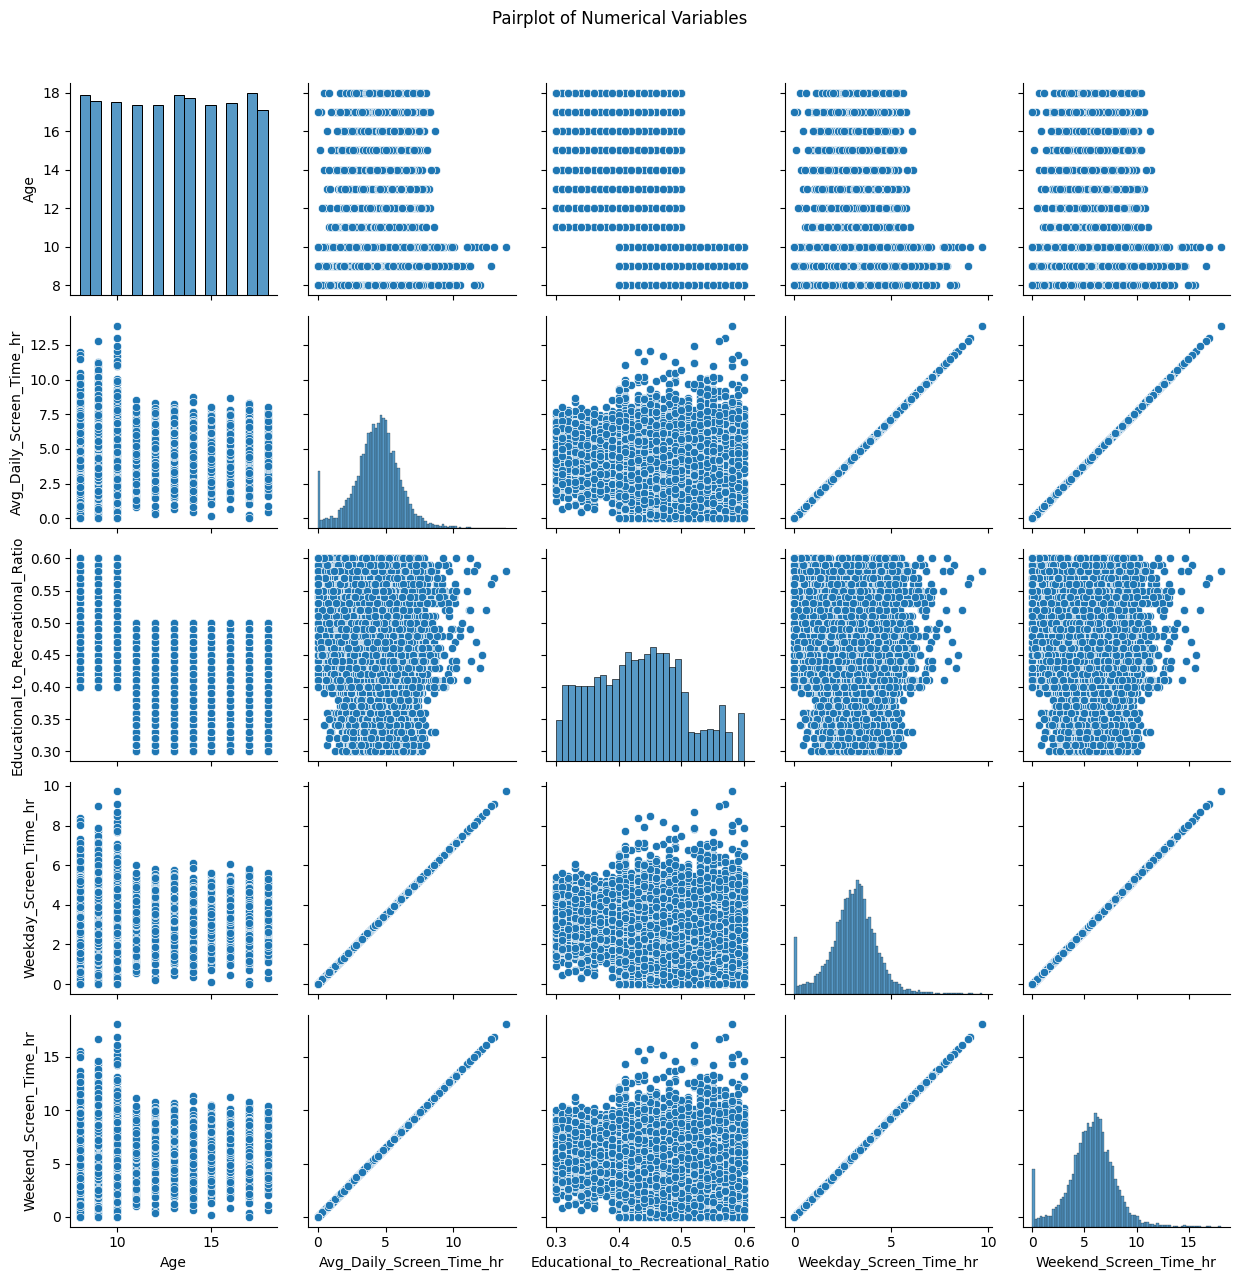

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio', 'Weekday_Screen_Time_hr', 'Weekend_Screen_Time_hr']

sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()

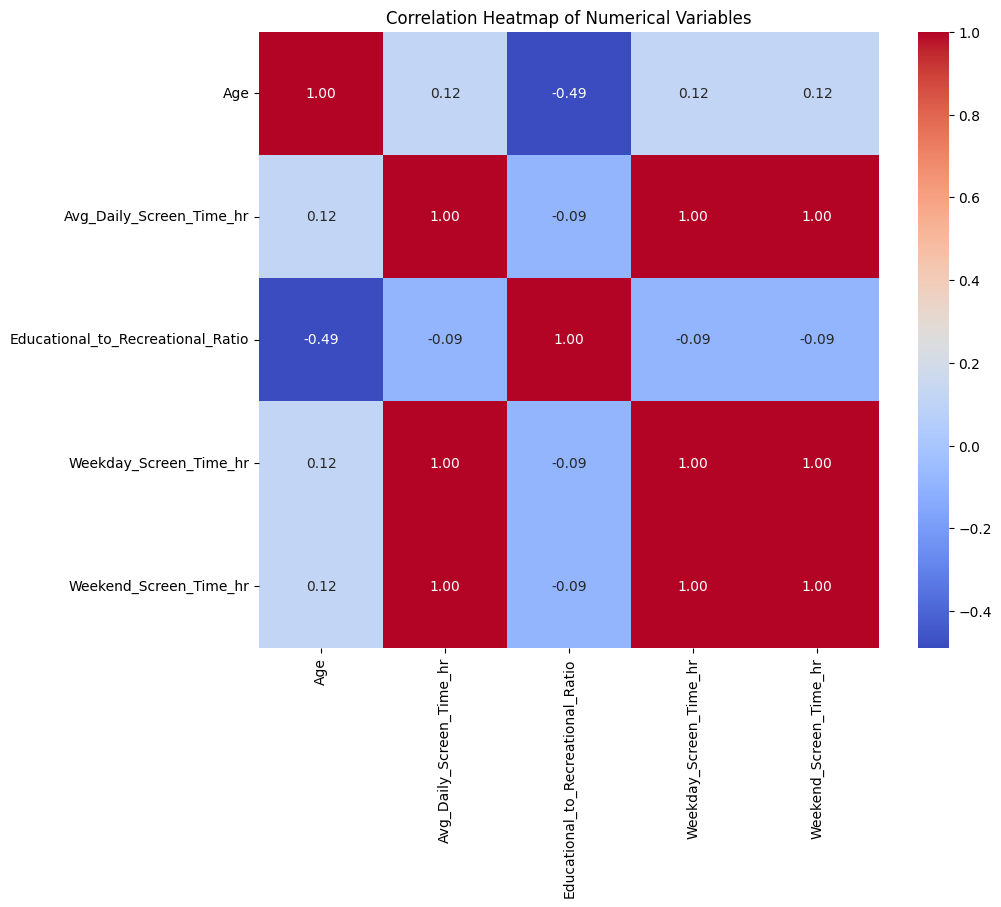

In [7]:
numerical_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio', 'Weekday_Screen_Time_hr', 'Weekend_Screen_Time_hr']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Missing values in the `Health_Impacts` column were successfully filled with "No Health Impact".
*   Based on assumed proportions (70% weekday, 130% weekend), average screen time is higher on weekends than weekdays for both genders.
*   The FacetGrid visualization shows the distribution of average daily screen time across different primary devices and genders.
*   The pairplot displays the relationships between numerical variables, including Age, Avg\_Daily\_Screen\_Time\_hr, Educational\_to\_Recreational\_Ratio, Weekday\_Screen\_Time\_hr, and Weekend\_Screen\_Time\_hr.
*   The correlation heatmap indicates the strength and direction of linear relationships between the selected numerical variables.

### Insights or Next Steps

*   The analysis on weekday vs. weekend screen time relies on an assumption; validating this assumption with actual data would provide more accurate insights.
*   Further investigation into the specific health impacts mentioned in the dataset could provide valuable context to screen time patterns.
